# **Project Title** :Bank Telemarketing Campaign Effectiveness Prediction

#### **Project Type**    - Supervised learning (Classification problem)
#### **Name**            - Mandar Vasant Tarmale
#### **Roll No**    - 19

## Problem Statement

One of the Portuguese bank conducted a marketing campaign based on phone calls.The records of their marketing campaign are available in the form of a dataset.The objective here is to apply machine learning techniques to analyse the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more cutomers to subscribe to banks term deposit.

## Hypothesis Generation

**H0 (Null Hypothesis):** The Customer/Client  will subscribe the term deposit/Fixed deposit.

**H1 (Alternative Hypothesis):**  The Customer/Client  will does not subscribe the term deposit/Fixed deposit.

## Data Sources and Objectives

The dataset is based on "Bank Marketing" UCI Dataset

The Link for the dataset is : https://archive.ics.uci.edu/dataset/222/bank+marketing

The dataset is taken from the Portuguese bank and this data is not complete because the reason of confidentiality but they have tries to keep it real.

**The Binary classification goal is to predict if the client will subscribe a bank term  deposit.**

Domain : Banking and Finance

Dataset Char : Multivariate data

Associated Task : Classification

Number of Instances : 45211

Number of Attributes : 16

## Data Description

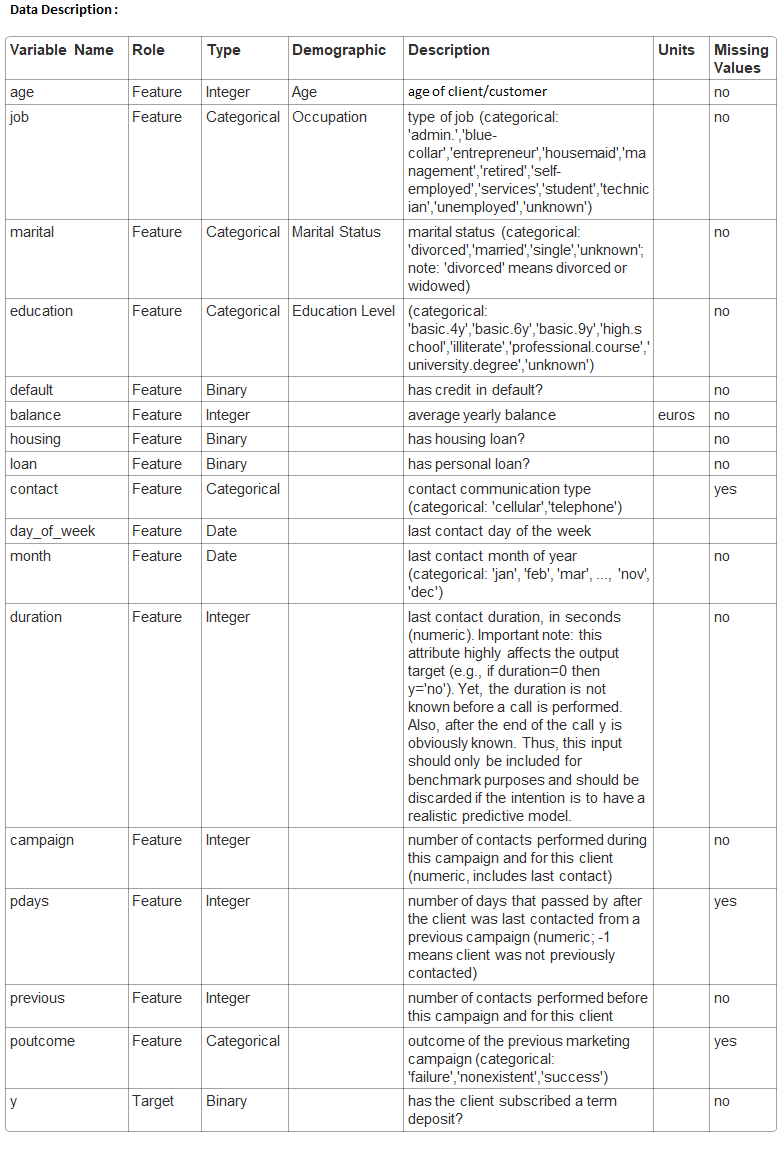


## Loading packages and Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv('/content/drive/MyDrive/Subhash Sir/ML Project /Datasets/bank-full.csv')

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Missing Values Treatment

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in the banking dataset

In [ ]:
bank.duplicated().sum()

0

There are no duplicates rows in the dataset

## Data Exploration

In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank[['age','housing']].iloc[6:11]

,age,housing
6,28,yes
7,42,yes
8,58,yes
9,43,yes
10,41,yes


In [ ]:
bank[['age','housing','duration']].loc[bank.age>40]

,age,housing,duration
0,58,yes,261
1,44,yes,151
3,47,yes,92
7,42,yes,380
8,58,yes,50
...,...,...,...
45204,73,no,300
45206,51,no,977
45207,71,no,456
45208,72,no,1127


In [ ]:
bank[['age','y']].iloc[500:10000]

,age,y
500,46,no
501,32,no
502,37,no
503,29,no
504,41,no
...,...,...
9995,49,no
9996,52,no
9997,40,no
9998,46,no


In [ ]:
bank[['age','y']].loc[bank.y=='yes'].iloc[50:100]

,age,y
2377,38,yes
2387,24,yes
2388,54,yes
2404,34,yes
2474,23,yes
2483,60,yes
2485,48,yes
2486,45,yes
2507,36,yes
2519,52,yes


In [ ]:
print(bank['duration'].sample(2))

16571    311
18025     87
Name: duration, dtype: int64


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- The **pdays column** contains values of **-1**, which indicate that some of the customers were not contacted previously as part of the bank's marketing campaign.

- The balance column contains some negative values, which could indicate that certain customers have outstanding debts or have overdrawn on their accounts. These **negative balances** suggest that some customers may be experiencing financial difficulties or money problems.


## Creating and Transforming Data

In [ ]:
bank.loc[bank.pdays<0,"pdays"]= np.NaN
bank.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [ ]:
# Deleting the rows which column 'poutcome' contains 'other'
condition = bank.poutcome == 'other'
bank = bank.drop(bank[condition].index, axis = 0, inplace = False)

In [ ]:
# Filling 'unknown' in job to 'other_job'
bank[['job']] = bank[['job']].replace(['unknown'],'other_job')

In [ ]:
# Filling 'unknown' in education to 'other_edu'
bank[['education']] = bank[['education']].replace(['unknown'],'other_edu')

In [ ]:
# Filling 'unknown' in contact to 'other'
bank[['contact']] = bank[['contact']].replace(['unknown'],'other_contact')

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

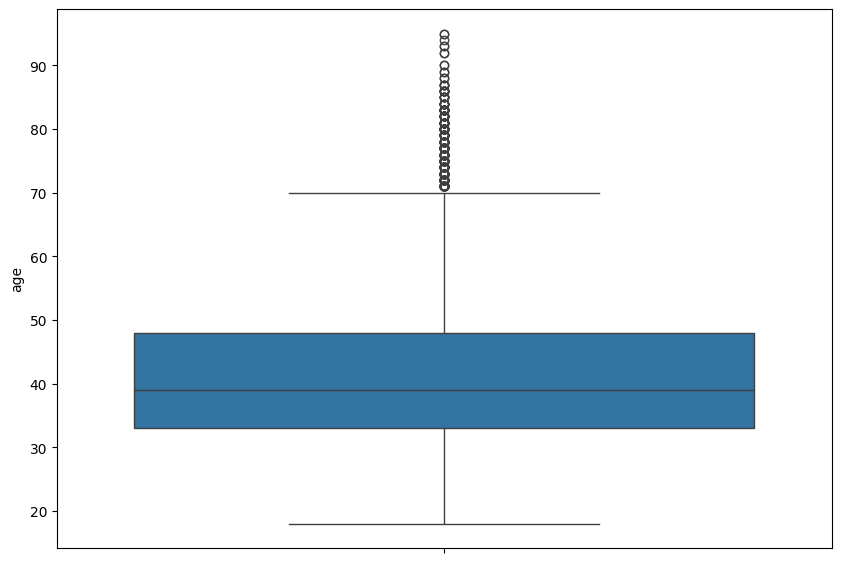

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data = bank.age)
plt.show()

In [ ]:
max(bank.age)

95

In the Age Column,We all know that Minimum age 18 is required to open a bank account. Also,There might be some senior citizens, old clients, young professional and students in this column. That is why, I have not done outlier analysis here.

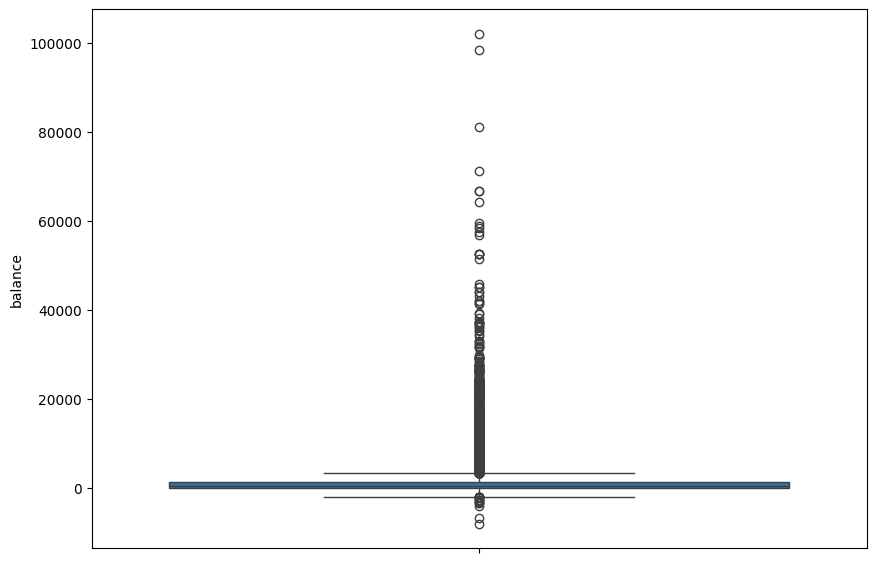

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data = bank.balance)
plt.show()

- In these scenarios, it is not advisable to remove outliers from the dataset as they contain valuable information. For example, in the bank balance column, some customers have high balances while some have non-positive balances. If we remove these outliers, our model will not have sufficient information to make accurate predictions, and there is a risk of overfitting.

- Similarly, for the age column, there are outliers in the dataset, but we need to train our model to make predictions based on all available factors. If we remove the outliers, we may lose critical information that can affect the accuracy of our model. Therefore, it is important to keep the outliers in the dataset and use appropriate techniques to handle them during model training. here not any issue because we use robust algorithms.

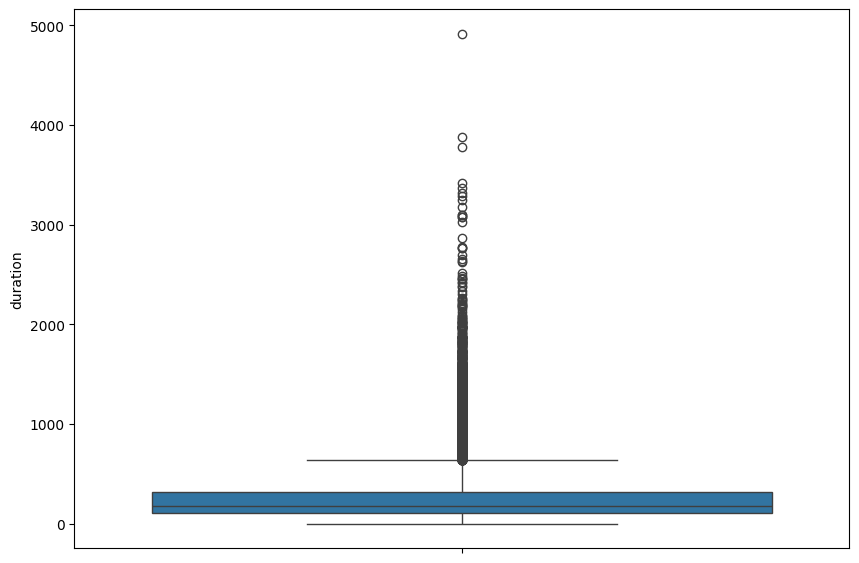

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data = bank.duration)
plt.show()

The duration column contains the client talktime with the marketing team. So, there might be some client who are responsding positively to the team and that leads to higher duration. Hence, I have not done outlier analysis by taking in this part consideration.

#### Univariate Analysis

In [ ]:
# check target columns value counts

bank['y'].value_counts()

no     38389
yes     4982
Name: y, dtype: int64

<Axes: >

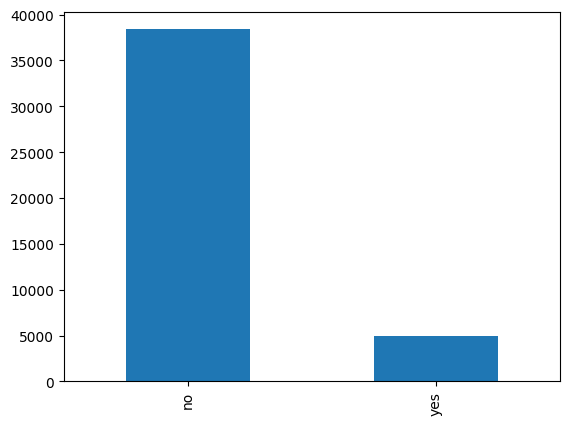

In [ ]:
bank['y'].value_counts().plot(kind='bar')

- The target column is highly imbalanced, with a **low ratio of positive responses (yes) to negative responses (no).** This is expected in a marketing campaign, as only a **small percentage of the target audience may be interested in the term deposit being offered**.

Marital Status

In [ ]:
#Calculate the percentage of each marital status category.
marital=bank.marital.value_counts(normalize=True)*100
marital

married     60.471283
single      28.037168
divorced    11.491550
Name: marital, dtype: float64

<Axes: title={'center': 'Percentage of Marital Status Category'}, ylabel='marital'>

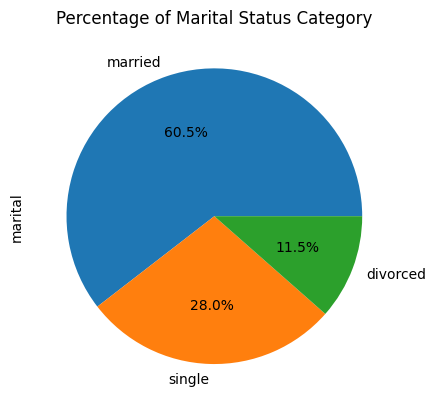

In [ ]:
#plot the bar graph of percentage marital status categories
marital.plot(kind='pie',title="Percentage of Marital Status Category",autopct='%1.1f%%')

**Observations:**
- The above pie chart suggest that the bank's marketing efforts are primarily focused on married individuals, followed by singles, while divorced individuals are targeted to a lesser extent.

Job

In [ ]:
#Calculate the percentage of each job status category.
job=bank.job.value_counts(normalize=True)*100
job

blue-collar      21.514376
management       20.901063
technician       16.826912
admin.           11.367042
services          9.169722
retired           5.028706
self-employed     3.500035
entrepreneur      3.338636
unemployed        2.919001
housemaid         2.799105
student           1.975975
other_job         0.659427
Name: job, dtype: float64

<Axes: title={'center': 'Percentage of Each Job Category'}>

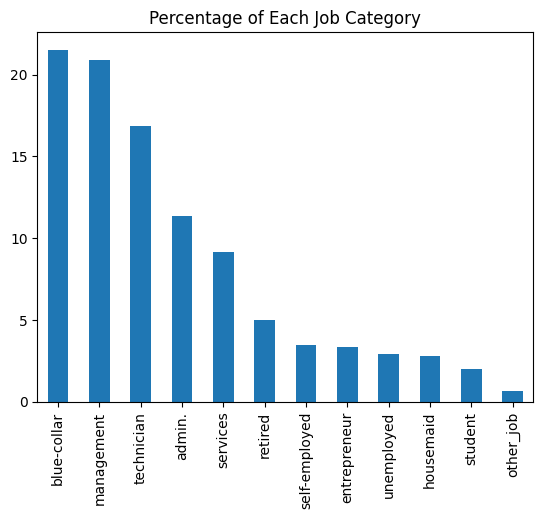

In [ ]:
job.plot(kind='bar', title='Percentage of Each Job Category', legend=False)

**Observations:-**
- Based on the visualization of percentage of job categories of bank customers, we can observe that the bank targets customers with job roles such as  blue-collar, management, technician, admin, and services. On the other hand, customers with job roles such as entrepreneurs, self-employed, unemployed, students, and housemaids are less likely to be targeted by the bank.

- This observation makes sense as job roles such as blue-collar,management, technician, admin, and services are more likely to have a steady income and financial stability, which makes them potential candidates for bank services such as loans, credit cards, and other financial products. On the other hand, job roles such as self-employed, unemployed, and students are less likely to have a steady income, which makes them less likely to be targeted by the bank.

Education

In [ ]:
#calculate the percentage of each education category.
education=bank.education.value_counts(normalize=True)*100
education

secondary    51.220862
tertiary     29.413664
primary      15.233681
other_edu     4.131793
Name: education, dtype: float64

<Axes: title={'center': 'Percentage of Education Status Category'}, ylabel='education'>

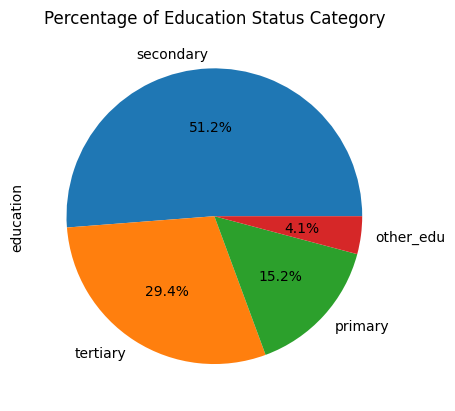

In [ ]:
#plot the pie chart of education categories
education.plot(kind='pie',title="Percentage of Education Status Category",autopct='%1.1f%%')

**Observations:**
- These pie chart suggest that the bank's will targets customer with secondary and tertiary levels of education.
- This can be concluded as higher education levels often correlate with higher income levels and financial stability, potentially making these individuals more attractive targets for the bank's services and products.

Poutcome

In [ ]:
#Calculate the percentage of each poutcome category.
poutcome=bank.poutcome.value_counts(normalize=True)*100
poutcome

unknown    85.215928
failure    11.300178
success     3.483895
Name: poutcome, dtype: float64

<Axes: title={'center': 'Percentage of poutcome Status Category'}, ylabel='poutcome'>

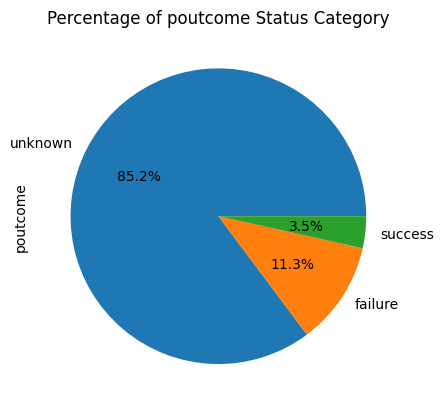

In [ ]:
poutcome.plot(kind='pie',title="Percentage of poutcome Status Category",autopct='%1.1f%%')

In [ ]:
poutcometarget=bank[~(bank.poutcome=='unknown')].poutcome.value_counts(normalize=True)*100
poutcometarget

failure    76.43481
success    23.56519
Name: poutcome, dtype: float64

<Axes: title={'center': 'Percentage of poutcome Status Category'}, ylabel='poutcome'>

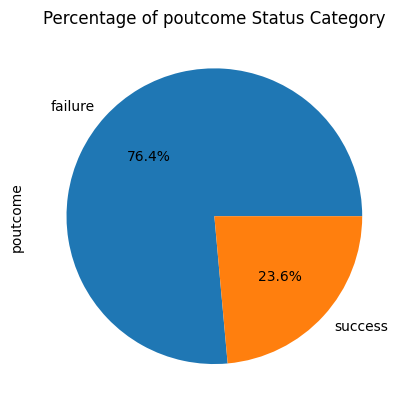

In [ ]:
poutcometarget.plot(kind='pie',title="Percentage of poutcome Status Category",autopct='%1.1f%%')

**Observations:**

- These pie chart indicate that the maximum of known outcomes from previous marketing campaigns resulted in failure, while a smaller proportion got success.

Response

In [ ]:
#Calculate the percentage of each response category.
response=bank.y.value_counts(normalize=True)*100
response

no     88.513062
yes    11.486938
Name: y, dtype: float64

<Axes: title={'center': 'Percentage of Response Of Client'}, ylabel='y'>

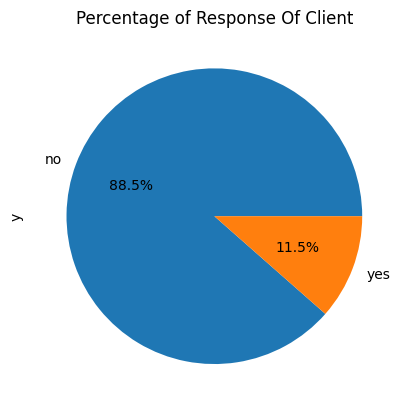

In [ ]:
#plot the pie chart of response categories
response.plot(kind='pie',title="Percentage of Response Of Client",autopct='%1.1f%%')

**Observations:**

- The ratio of non-subscribed to subscribed customers is 88:12, showing that the bank invested a considerable amount of time, resources, and manpower without generating the desired outcome. To overcome this issue, I build a predictive model that can efficiently identify potential customers likely to subscribe to the term deposit, saving time and resources.

- However, the data is also imbalanced, which can impact the accuracy of the predictive model. we implementing various techniques in feature engineering to balance the dataset and improve model performance.

#### Bivariate Analysis

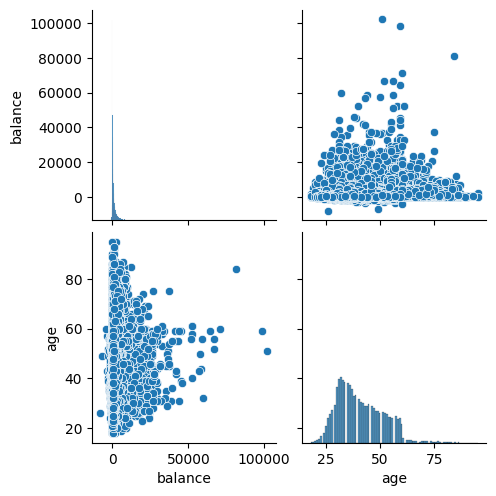

In [ ]:
#plot the pair plot of balance and age in inp1 dataframe.
sns.pairplot(data=bank,vars=['balance','age'])
plt.show()

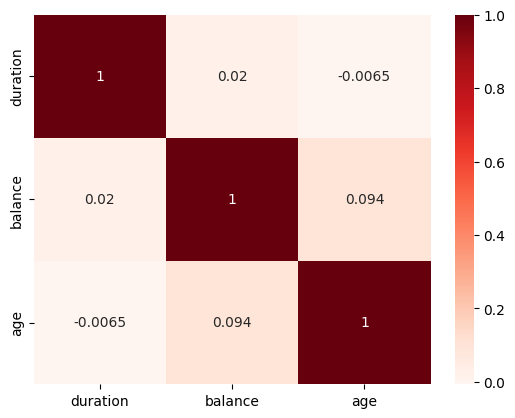

In [ ]:
sns.heatmap(bank[['duration','balance','age']].corr(),annot=True,cmap='Reds')

plt.show()

#### Multivariate Analysis

In [ ]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

<ipython-input-42-cb3aaad1f2cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


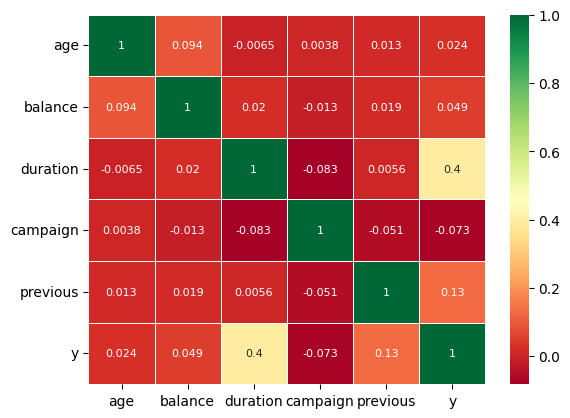

In [ ]:
corr_data = bank[['age','balance','duration','campaign','previous','y','housing','default','loan']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.6,annot_kws={'size':8})

## One-Hot Encoding

In [ ]:
Job_df = pd.get_dummies(bank.job, prefix ='class')
Job_df

,class_admin.,class_blue-collar,class_entrepreneur,class_housemaid,class_management,class_other_job,class_retired,class_self-employed,class_services,class_student,class_technician,class_unemployed
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45205,0,0,0,0,0,0,0,0,0,0,1,0
45206,0,0,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
edu_df = pd.get_dummies(bank.education, prefix ='class')
edu_df

,class_other_edu,class_primary,class_secondary,class_tertiary
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
45205,0,0,1,0
45206,0,0,0,1
45207,0,1,0,0
45208,0,0,1,0


In [ ]:
marital_df = pd.get_dummies(bank.marital, prefix ='class')
marital_df

,class_divorced,class_married,class_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45205,0,0,1
45206,0,1,0
45207,1,0,0
45208,0,1,0


In [ ]:
contact_df = pd.get_dummies(bank.contact, prefix ='class')
contact_df

,class_cellular,class_other_contact,class_telephone
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
45205,1,0,0
45206,1,0,0
45207,1,0,0
45208,1,0,0


In [ ]:
poutcome_df = pd.get_dummies(bank.poutcome, prefix ='class')
poutcome_df

,class_failure,class_success,class_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
45205,0,0,1
45206,0,0,1
45207,0,0,1
45208,0,1,0


In [ ]:
bank = pd.concat([bank, Job_df], axis=1 , join='inner')

In [ ]:
bank = pd.concat([bank, edu_df], axis=1 , join='inner')

In [ ]:
bank = pd.concat([bank, marital_df], axis=1 , join='inner')

In [ ]:
bank = pd.concat([bank, contact_df], axis=1 , join='inner')

In [ ]:
bank = pd.concat([bank, poutcome_df], axis=1 , join='inner')

In [ ]:
bank.loan.head()

0     no
1     no
2    yes
3     no
4     no
Name: loan, dtype: object

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'class_admin.', 'class_blue-collar',
       'class_entrepreneur', 'class_housemaid', 'class_management',
       'class_other_job', 'class_retired', 'class_self-employed',
       'class_services', 'class_student', 'class_technician',
       'class_unemployed', 'class_other_edu', 'class_primary',
       'class_secondary', 'class_tertiary', 'class_divorced', 'class_married',
       'class_single', 'class_cellular', 'class_other_contact',
       'class_telephone', 'class_failure', 'class_success', 'class_unknown'],
      dtype='object')

## Binary Encoding

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
bank['default'] = lb.fit_transform(bank['default'])
bank['housing'] = lb.fit_transform(bank['housing'])
bank['y'] = lb.fit_transform(bank['y'])
bank['loan'] = lb.fit_transform(bank['loan'])

In [ ]:
bank.drop(columns=['job','education','day','marital','poutcome','contact','pdays'], inplace=True)

In [ ]:
bank.head()

,age,default,balance,housing,loan,month,duration,campaign,previous,y,...,class_tertiary,class_divorced,class_married,class_single,class_cellular,class_other_contact,class_telephone,class_failure,class_success,class_unknown
0,58,0,2143,1,0,may,261,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,44,0,29,1,0,may,151,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,33,0,2,1,1,may,76,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,47,0,1506,1,0,may,92,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,may,198,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
# Changing 'month' from words to numbers for easier analysis
lst = [bank]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [ ]:
bank.head()

,age,default,balance,housing,loan,month,duration,campaign,previous,y,...,class_divorced,class_married,class_single,class_cellular,class_other_contact,class_telephone,class_failure,class_success,class_unknown,month_int
0,58,0,2143,1,0,may,261,1,0,0,...,0,1,0,0,1,0,0,0,1,5.0
1,44,0,29,1,0,may,151,1,0,0,...,0,0,1,0,1,0,0,0,1,5.0
2,33,0,2,1,1,may,76,1,0,0,...,0,1,0,0,1,0,0,0,1,5.0
3,47,0,1506,1,0,may,92,1,0,0,...,0,1,0,0,1,0,0,0,1,5.0
4,33,0,1,0,0,may,198,1,0,0,...,0,0,1,0,1,0,0,0,1,5.0


In [ ]:
bank.drop(columns=['month'],inplace=True)

In [ ]:
bank['month_int'] = bank['month_int'].astype('int')

In [ ]:
bank.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,class_admin.,...,class_divorced,class_married,class_single,class_cellular,class_other_contact,class_telephone,class_failure,class_success,class_unknown,month_int
0,58,0,2143,1,0,261,1,0,0,0,...,0,1,0,0,1,0,0,0,1,5
1,44,0,29,1,0,151,1,0,0,0,...,0,0,1,0,1,0,0,0,1,5
2,33,0,2,1,1,76,1,0,0,0,...,0,1,0,0,1,0,0,0,1,5
3,47,0,1506,1,0,92,1,0,0,0,...,0,1,0,0,1,0,0,0,1,5
4,33,0,1,0,0,198,1,0,0,0,...,0,0,1,0,1,0,0,0,1,5


In [ ]:
bank.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
duration               0
campaign               0
previous               0
y                      0
class_admin.           0
class_blue-collar      0
class_entrepreneur     0
class_housemaid        0
class_management       0
class_other_job        0
class_retired          0
class_self-employed    0
class_services         0
class_student          0
class_technician       0
class_unemployed       0
class_other_edu        0
class_primary          0
class_secondary        0
class_tertiary         0
class_divorced         0
class_married          0
class_single           0
class_cellular         0
class_other_contact    0
class_telephone        0
class_failure          0
class_success          0
class_unknown          0
month_int              0
dtype: int64

In [ ]:
# Changing column name: 'y' to 'response'
bank.rename(index=str, columns={'y': 'response'}, inplace = True)

In [ ]:
bank.response.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

## SMOTE Oversampling for handling class imbalance

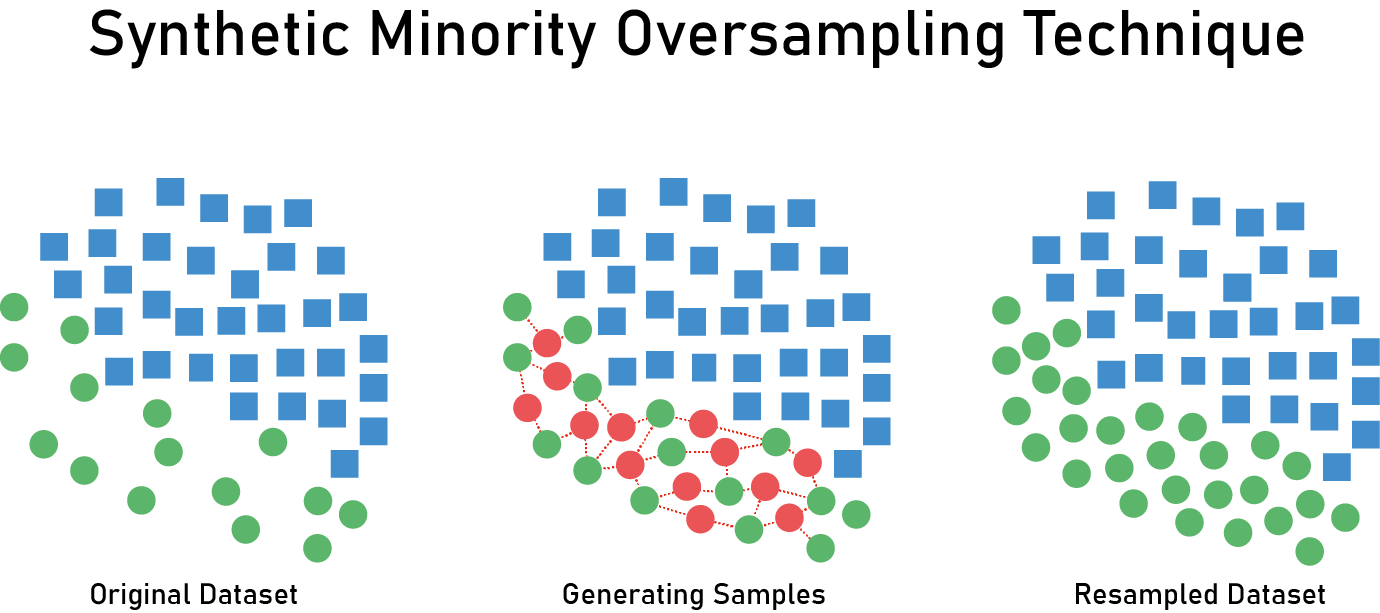

Reference: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

In [ ]:
bank=bank.reset_index(drop=True)

In [ ]:
x=bank.drop(columns=['response'],axis=1)
y=(bank['response'])

In [ ]:
# for handling class imbalance
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
sampler = SMOTE()

# Resampling the data
X_resampled, y_resampled = sampler.fit_resample(x, y)

In [ ]:
# Original length and Resampled Length

print('Original Dataset length',len(x))
print('Resampled Dataset length',len(X_resampled))

Original Dataset length 43371
Resampled Dataset length 76778


## Feature Scaling

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=0)

In [ ]:
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'response', 'class_admin.', 'class_blue-collar',
       'class_entrepreneur', 'class_housemaid', 'class_management',
       'class_other_job', 'class_retired', 'class_self-employed',
       'class_services', 'class_student', 'class_technician',
       'class_unemployed', 'class_other_edu', 'class_primary',
       'class_secondary', 'class_tertiary', 'class_divorced', 'class_married',
       'class_single', 'class_cellular', 'class_other_contact',
       'class_telephone', 'class_failure', 'class_success', 'class_unknown',
       'month_int'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns excluding one-hot encoded columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'previous', 'month_int',]

# Apply standard scaling only to numerical columns
scaler = StandardScaler()
bank[numerical_columns] = scaler.fit_transform(bank[numerical_columns])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['default','housing', 'loan','response', 'class_admin.', 'class_blue-collar',
       'class_entrepreneur', 'class_housemaid', 'class_management',
       'class_other_job', 'class_retired', 'class_self-employed',
       'class_services', 'class_student', 'class_technician',
       'class_unemployed', 'class_other_edu', 'class_primary',
       'class_secondary', 'class_tertiary', 'class_divorced', 'class_married',
       'class_single', 'class_cellular', 'class_other_contact',
       'class_telephone', 'class_failure', 'class_success', 'class_unknown']

# Apply MinMax scaling
scaler = MinMaxScaler()
bank[columns_to_scale] = scaler.fit_transform(bank[columns_to_scale])

## DT Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

dt_pred_test = dt_model.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_pred_test)

print("Confusion Matrix:\n", dt_conf_matrix)

print("-----------------------------------------------")

print("Classification Report:\n", classification_report(y_test, dt_pred_test))


Confusion Matrix:
 [[6968  654]
 [ 595 7139]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7622
           1       0.92      0.92      0.92      7734

    accuracy                           0.92     15356
   macro avg       0.92      0.92      0.92     15356
weighted avg       0.92      0.92      0.92     15356



In [ ]:
dt_accuracy = accuracy_score(y_test, dt_pred_test) * 100
print("Accuracy:", dt_accuracy)

Accuracy: 91.86637145089868


## RF Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_pred_test = rf_model.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)

print("Confusion Matrix:\n", rf_conf_matrix)

print("-----------------------------------------------")

print("Classification Report:\n", classification_report(y_test, rf_pred_test))


Confusion Matrix:
 [[7315  307]
 [ 572 7162]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7622
           1       0.96      0.93      0.94      7734

    accuracy                           0.94     15356
   macro avg       0.94      0.94      0.94     15356
weighted avg       0.94      0.94      0.94     15356



In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred_test) * 100
print("Accuracy:", rf_accuracy)

Accuracy: 94.27585308674134


## XGB Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

xg_model = XGBClassifier()

xg_model.fit(X_train, y_train)

xg_pred_test = xg_model.predict(X_test)

xg_conf_matrix = confusion_matrix(y_test, xg_pred_test)

print("Confusion Matrix:\n", xg_conf_matrix)

print("-----------------------------------------------")

print("Classification Report:\n", classification_report(y_test, xg_pred_test))


Confusion Matrix:
 [[7278  344]
 [ 548 7186]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7622
           1       0.95      0.93      0.94      7734

    accuracy                           0.94     15356
   macro avg       0.94      0.94      0.94     15356
weighted avg       0.94      0.94      0.94     15356



In [ ]:
xgb_accuracy = accuracy_score(y_test, xg_pred_test) * 100
print("Accuracy:", xgb_accuracy)

Accuracy: 94.19119562386038


## NB Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Instantiate the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the testing data
nb_pred_test = nb_model.predict(X_test)

# Calculate the confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_pred_test)

# Print confusion matrix
print("Confusion Matrix:\n", nb_conf_matrix)

print("-----------------------------------------------")

# Print classification report
print("Classification Report:\n", classification_report(y_test, nb_pred_test))

Confusion Matrix:
 [[6112 1510]
 [ 768 6966]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      7622
           1       0.82      0.90      0.86      7734

    accuracy                           0.85     15356
   macro avg       0.86      0.85      0.85     15356
weighted avg       0.85      0.85      0.85     15356



In [ ]:
nb_accuracy = accuracy_score(y_test, nb_pred_test) * 100
print("Accuracy:", nb_accuracy)

Accuracy: 85.16540765824433


## GB Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Instantiate the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
gb_pred_test = gb_model.predict(X_test)

# Calculate the confusion matrix
gb_conf_matrix = confusion_matrix(y_test, gb_pred_test)

# Print confusion matrix
print("Confusion Matrix:\n", gb_conf_matrix)

print("-----------------------------------------------")

# Print classification report
print("Classification Report:\n", classification_report(y_test, gb_pred_test))


Confusion Matrix:
 [[7177  445]
 [ 620 7114]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7622
           1       0.94      0.92      0.93      7734

    accuracy                           0.93     15356
   macro avg       0.93      0.93      0.93     15356
weighted avg       0.93      0.93      0.93     15356



In [ ]:
gb_accuracy = accuracy_score(y_test, gb_pred_test) * 100
print("Accuracy:", gb_accuracy)

Accuracy: 93.0646001562907


## Best Perfoming Model

### **`🥇 Random Forest Classifier with hyperparameter tuning 🥇`**

#####Fine-Tuning the RF Model

In [ ]:
params = {
    'n_estimators':np.arange(10, 1000, 120),
    'criterion':['gini','entropy'],
    'max_depth' :[7,10,13,15,18,20,22,26,28],
    'min_samples_split':[2,3,5,8]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(
    rf_model,
    param_distributions=params,
    n_iter=10,
    n_jobs=-1,
    scoring='roc_auc',
    cv=5,
    verbose=5
)

In [ ]:
rsearch

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [7, 10, 13, 15, 18, 20, 22,
                                                      26, 28],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': array([ 10, 130, 250, 370, 490, 610, 730, 850, 970])},
                   scoring='roc_auc', verbose=5)

In [ ]:
rsearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [7, 10, 13, 15, 18, 20, 22,
                                                      26, 28],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': array([ 10, 130, 250, 370, 490, 610, 730, 850, 970])},
                   scoring='roc_auc', verbose=5)

In [ ]:
rsearch.best_params_

{'n_estimators': 130,
 'min_samples_split': 3,
 'max_depth': 22,
 'criterion': 'gini'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=130,min_samples_split=3,max_depth=22,criterion='gini',random_state=101)

rf_model.fit(X_train, y_train)

rf_pred_test = rf_model.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)

print("Confusion Matrix:\n", rf_conf_matrix)

print("-----------------------------------------------")

print("Classification Report:\n", classification_report(y_test, rf_pred_test))

Confusion Matrix:
 [[7303  319]
 [ 559 7175]]
-----------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7622
           1       0.96      0.93      0.94      7734

    accuracy                           0.94     15356
   macro avg       0.94      0.94      0.94     15356
weighted avg       0.94      0.94      0.94     15356



In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred_test) * 100
print("Accuracy:", rf_accuracy)

Accuracy: 94.28236519927064


In [ ]:
import numpy as np
from sklearn .metrics import roc_auc_score
np.round(roc_auc_score(y_test, rf_pred_test),5)

0.94293

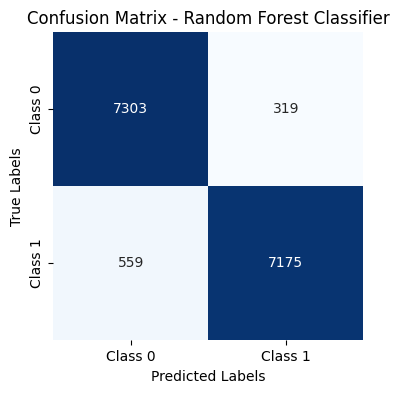

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

model_report = classification_report(y_test, rf_pred_test)


print("Classification Report:")
print(model_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7622
           1       0.96      0.93      0.94      7734

    accuracy                           0.94     15356
   macro avg       0.94      0.94      0.94     15356
weighted avg       0.94      0.94      0.94     15356



Upon evaluation on the test set, the Random Forest model accurately predicted customer responses. Out of 15,356 calls, 7,303 were correctly identified as positive responses (subscribed to the bank's service), while 7,175 were correctly identified as negative responses (did not subscribe). However, there were 319 false positive responses and 559 false negative responses.



The model achieved an accuracy of 94%, indicating the proportion of correctly classified responses. Precision for identifying non-subscribers was 93%, while for subscribers it was 96%. Recall rates were 96% for non-subscribers and 93% for subscribers. The F1-score, a measure of a model's accuracy, was 94% for both classes. These metrics suggest that the Random Forest model performs well in predicting customer responses in bank telemarketing campaigns.

### Ploting ROC and AUC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC score for RF
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_test)
auc_rf = auc(rf_fpr, rf_tpr)


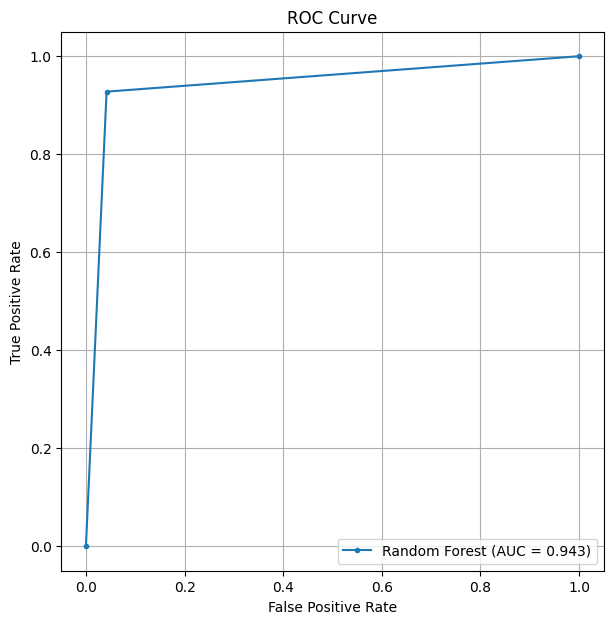

In [ ]:
classifiers = {'Random Forest': (rf_pred_test, rf_fpr, rf_tpr),}

plt.figure(figsize=(7, 7), dpi=100)

for clf_name, (y_pred, fpr, tpr) in classifiers.items():
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label='%s (AUC = %.3f)' % (clf_name, auc_score))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

As a rule of thumb, a ROC AUC score above 0.8 is considered good, while a score above 0.9 is considered great. Here, I have got the **ROC AUC score as 0.943**. It is saying that the Random Forest model performing well.